In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("../datasets/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies : 임신 횟수
    
Glucose : 포도당
    
BloodPressure : 혈압
    
SkinThickness : 팔 삼두근 뒤족의 피하지방 측정값
    
Insulin : 인슐린(혈청)
    
BMI : 체질량지수
    
DiabetesPedigreeFunction : 당뇨 내력 가중치
    
Age : 나이
    
Outcome : 0 또는 1

In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

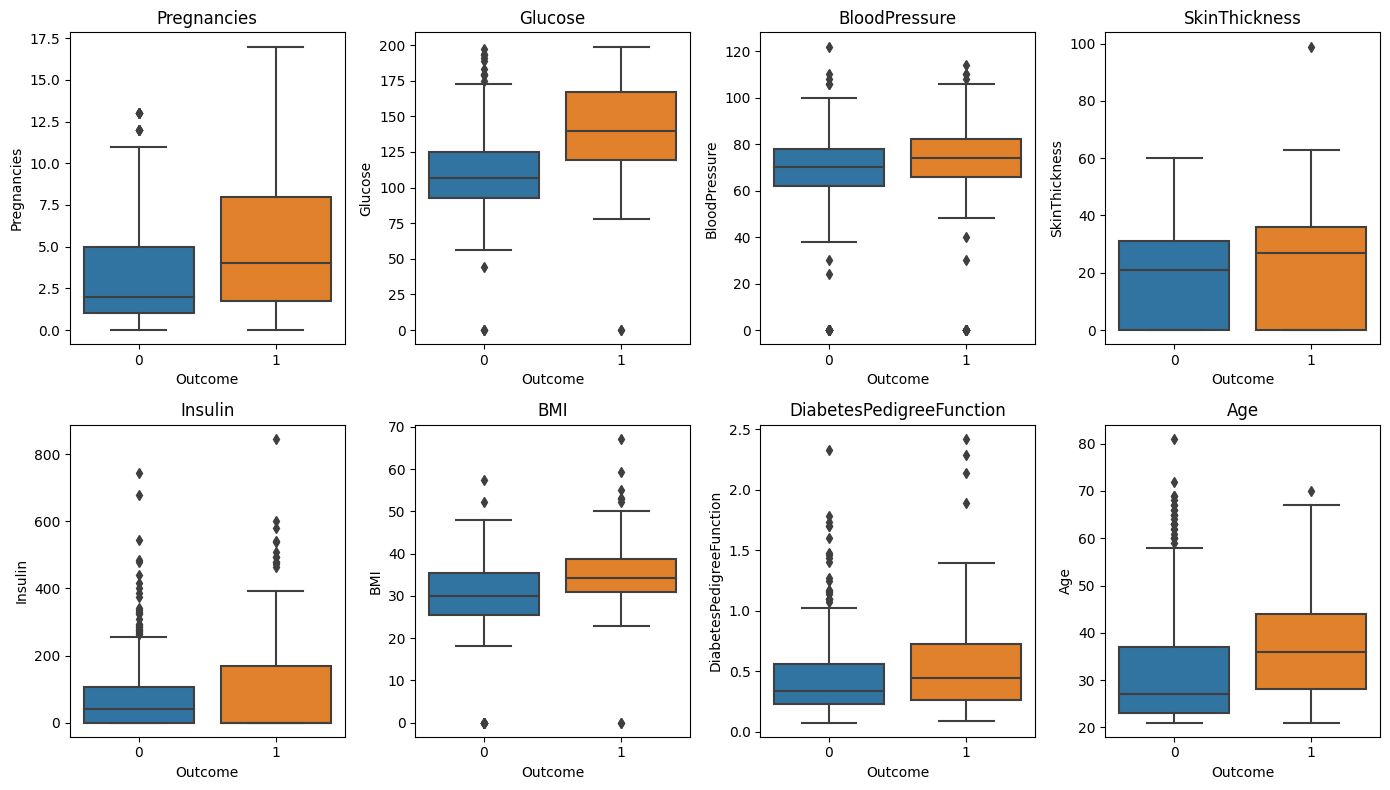

In [52]:
plt.figure(figsize=(14, 8))
for idx, column in enumerate(df.iloc[:, :-1]):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x="Outcome", y=column, data=df)
    plt.title(column)
    
plt.tight_layout()
plt.show()

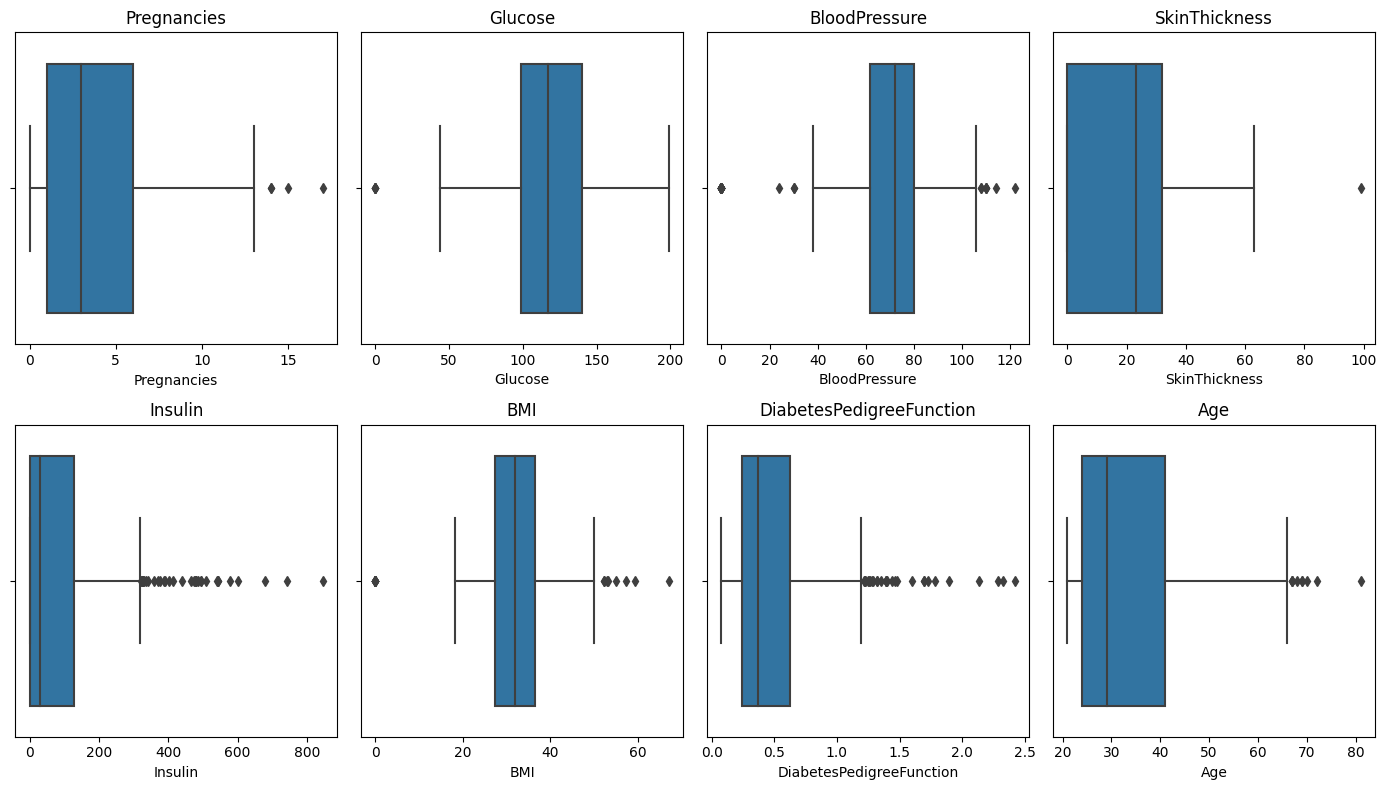

In [53]:
plt.figure(figsize=(14, 8))
for idx, column in enumerate(df.iloc[:, :-1]):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x=column, data=df, hue="Outcome")
    plt.title(column)
    
plt.tight_layout()
plt.show()

In [54]:
'''

Pregnancies : 임신 횟수
    
Glucose : 포도당
    
BloodPressure : 혈압
    
SkinThickness : 팔 삼두근 뒤족의 피하지방 측정값
    
Insulin : 인슐린(혈청)
    
BMI : 체질량지수
    
DiabetesPedigreeFunction : 당뇨 내력 가중치
    
Age : 나이
    
Outcome : 0 또는 1

'''

# 0값을 바꾸려고 한다.  0은 이상치로 보겠다.
# 0값을 바꿔야하는 컬럼 : Glucose, BloodPressure, SkinThickness, Insulin, BMI   0이면 안되는 애들
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[zero_features] = df[zero_features].replace(0,df[zero_features].mean())

In [55]:
for column in df.columns[:-1]:
    zero_count = df[df[column] == 0][column].count()
    print(f"{column} : {zero_count}")

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


In [56]:
# 1.데이터 준비 (target : 당뇨병 여부)
x = df.iloc[:, :-1]
y = df.iloc[:, :-1]
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [57]:
# 1-1.정규화
from sklearn.preprocessing import StandardScaler

In [58]:
x_scale = StandardScaler().fit_transform(x)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# 2.데이터분할
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=1)

In [61]:
# 3. 모델 선택
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [62]:
model = GaussianNB()
# model = LogisticRegression()
# model.fit = SVC

In [63]:
# 4. 학습
model.fit(x_train, y_train)

ValueError: y should be a 1d array, got an array of shape (537, 8) instead.

In [ ]:
# 5. 평가
model.score(x_test, y_test)